In [1]:
import torch
from basic_unet import UNet
from testnet import TestnetDataset
from plot_utils import plot_image_row
from torchvision import transforms
from pathlib import Path
import hdm

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = UNet(in_channels=1, out_channels=1)
state_dict = torch.load('models/2_testnet_0490.pth')
model.load_state_dict(state_dict)
model = model.to(device)
transform = transforms.Compose([
    transforms.Normalize([0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5])
])
dataset = TestnetDataset(Path('testnet'), transform)

In [3]:
explainer = hdm.HausdorffDistanceMasks(240, 240)
explainer.generate_masks(circle_size=30, offset=5, normalize=False)

In [4]:
sample = dataset.get_sample('1')
image = sample['input']
output = model(image.to(device).unsqueeze(0)).detach().cpu().squeeze()


def show_masked_difference(mask_x, mask_y):
    masked_image = explainer.apply_mask(explainer.masks[mask_x][mask_y], image[0])
    output_masked = model(masked_image.unsqueeze(0).to(device).unsqueeze(0)).detach().cpu().squeeze()
    difference = output - output_masked
    plot_image_row([masked_image, output_masked, difference],
                   labels=['Masked image', 'Output segment', 'Difference to unchanged output'])

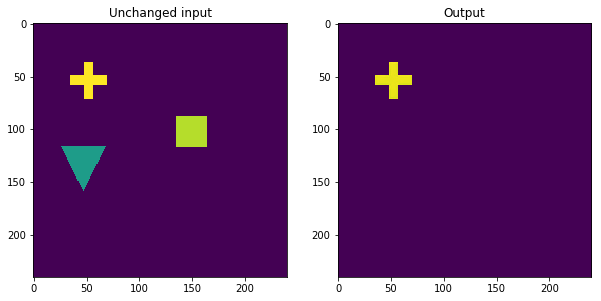

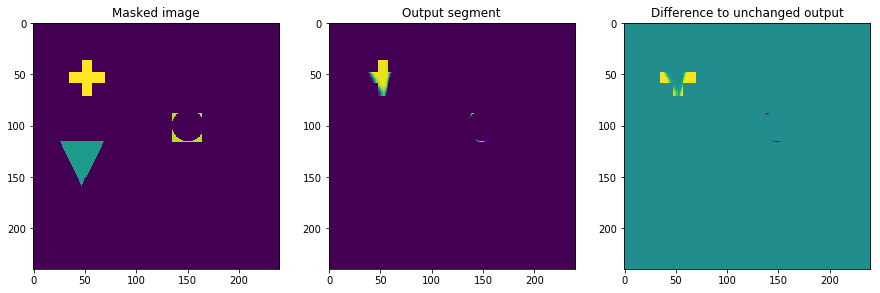

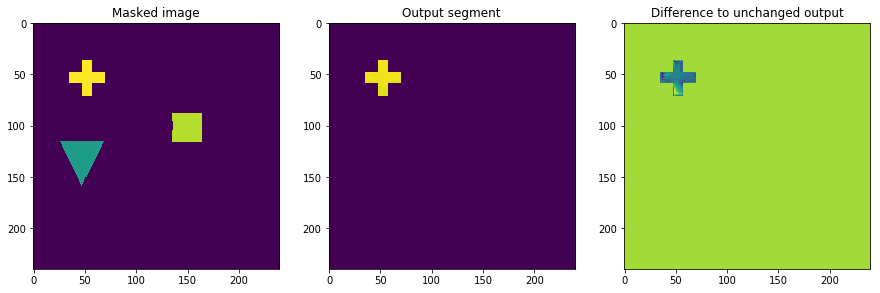

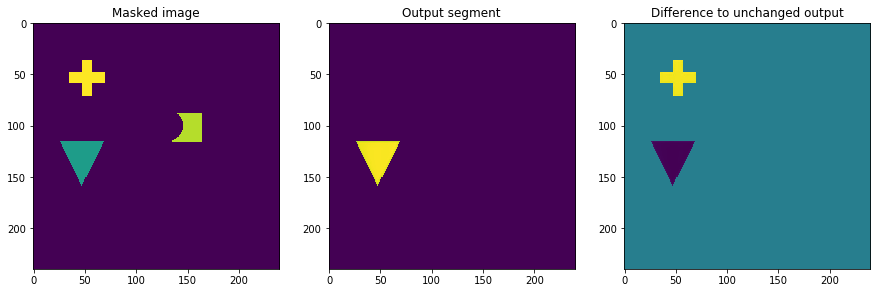

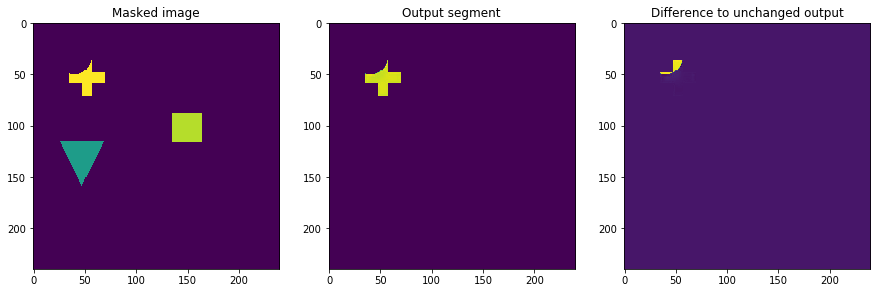

In [5]:
plot_image_row([image[0], output], labels=['Unchanged input', 'Output'])

show_masked_difference(17, 27)
show_masked_difference(17, 21)
show_masked_difference(17, 23)
show_masked_difference(4, 5)